# **New York City Yellow Taxi Data**
#*Name:**  Pranav Dhurandhar  
#**Assignment:** EDA_Optimising_NYC_Taxis_

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the libraries you will be using for analysis
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.3.2
pandas version: 2.3.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file
df = pd.read_parquet(r"D:\anime movies\iiit-B\NYC taxi record analysis\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-1.parquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [5]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os
import pandas as pd

# Select the folder having data files
os.chdir(r"D:\anime movies\iiit-B\NYC taxi record analysis\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records")

# Create a list of all the twelve files to read
file_list =  [f for f in os.listdir() if f.endswith('.parquet')]

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        month_df = pd.read_parquet(file_path)

        # extract date and hour
        month_df['date'] = month_df['tpep_pickup_datetime'].dt.date
        month_df['hour'] = month_df['tpep_pickup_datetime'].dt.hour



        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        # Loop through dates
        for d in month_df['date'].unique():

            day_df = month_df[month_df['date'] == d]

            # Iterate through each hour of the selected date
            for h in range(24):

                hour_data = day_df[day_df['hour'] == h]


                # Sample 5% of the hourly data randomly
                if len(hour_data) > 0:
                    sample = hour_data.sample(frac=0.05, random_state=42)


                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample], ignore_index=True)


        # Concatenate the sampled data of all the dates to a single dataframe
        df =   pd.concat([df, sampled_data], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")
        df.info()

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [56]:
# Store the df in csv/parquet
df.to_parquet(r"D:\anime movies\iiit-B\sampled_taxi_data.parquet", index=False)



## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [55]:
# Load the new data file
df = pd.read_parquet("sampled_taxi_data.parquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154159 entries, 0 to 2154158
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [54]:
 df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
5         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
5           7.10         1.0                  N           246            37   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2         32.4    6.0      0.5        0.00           0.0   
1             1          7.9    1.0      0.5        2.58           0.0   
2             2         11.4    1.0      0.5        0.00           0.0   
3             2          6.5    1.0      0.5        0.00           0.0   
5             1         34.5    3.5      0.5        7.90           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         41.15                   0.0         1.25  
1                    1.0         15.48                   2.5         0.00  
2                    1.0         16.40                   2.5         0.00  
3                    1.0         11.50                   2.5         0.00  
5                    1.0         47.40                   2.5         0.00

In [53]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2080119 entries, 0 to 2154158
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [57]:
# Fix the index and drop any columns that are not needed

df.reset_index(drop=True, inplace=True)

df.drop(columns=['date', 'hour'], inplace=True)

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154159 entries, 0 to 2154158
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [58]:
# Combine the two airport fee columns

df['airport_fee'] = df['airport_fee'].fillna(0) + df['Airport_fee'].fillna(0)

df.drop(columns=['Airport_fee'], inplace=True)

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154159 entries, 0 to 2154158
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [51]:
# check where values of fare amount are negative

df[df['fare_amount'] < 0]


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

Did you notice something different in the `RatecodeID` column for above records?

In [50]:
# Analyse RatecodeID for the negative fare amounts
df[df['fare_amount'] < 0]['RatecodeID'].value_counts()



Series([], Name: count, dtype: int64)

In [49]:
# Find which columns have negative values
num_cols = df.select_dtypes(include='number')

(num_cols < 0).sum()



VendorID                 0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

In [48]:
# fix these negative values

df = df[
    (df['extra'] >= 0) &
    (df['mta_tax'] >= 0) &
    (df['improvement_surcharge'] >= 0) &
    (df['total_amount'] >= 0) &
    (df['congestion_surcharge'] >= 0) &
    (df['airport_fee'] >= 0)
]


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [47]:
# Find the proportion of missing values in each column
(df.isna().mean()*100).sort_values(ascending=False)


VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
store_and_fwd_flag       0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
airport_fee              0.0
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [46]:
# Display the rows with null values
df[df['passenger_count'].isna()]
# Impute NaN values in 'passenger_count'
df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [45]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace=True)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [44]:
# handle null values in congestion_surcharge
df['congestion_surcharge'].fillna(0, inplace=True)



Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [43]:
# Handle any remaining missing values
df.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [64]:
# Describe the data and check if there are any potential outliers present
df.describe()
# Check for potential out of place values in various columns



VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  2.043684e+06                     2043684                     2043684   
mean   1.743489e+00  2023-06-30 09:40:22.246921  2023-06-30 09:57:37.942065   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00         2023-04-01 16:33:31  2023-04-01 16:50:57.750000   
50%    2.000000e+00         2023-06-23 20:34:22  2023-06-23 20:51:49.500000   
75%    2.000000e+00         2023-10-03 20:18:31  2023-10-03 20:34:31.250000   
max    2.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.367074e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     2.043684e+06   2.043684e+06  2.043684e+06  2.043684e+06   
mean      1.390645e+00   3.534996e+00  1.063260e+00  1.649345e+02   
min       1.000000e+00   1.000000e-02  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.100000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.820000e+00  1.000000e+00  1.610000e+02   
75%       1.000000e+00   3.490000e+00  1.000000e+00  2.330000e+02   
max       6.000000e+00   2.041000e+02  6.000000e+00  2.650000e+02   
std       8.795827e-01   4.591464e+00  3.337951e-01  6.336459e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  2.043684e+06  2.043684e+06  2.043684e+06  2.043684e+06  2.043684e+06   
mean   1.640185e+02  1.199073e+00  1.972619e+01  1.669295e+00  4.968810e-01   
min    1.000000e+00  1.000000e+00  1.000000e-02  0.000000e+00  0.000000e+00   
25%    1.130000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  8.000000e+02  1.425000e+01  4.000000e+00   
std    6.993908e+01  4.568092e-01  1.802094e+01  1.825479e+00  3.967519e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  2.043684e+06  2.043684e+06           2.043684e+06  2.043684e+06   
mean   3.625766e+00  5.917260e-01           9.996583e-01  2.895541e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  1.010000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.900000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.500000e+00  0.000000e+00           1.000000e+00  3.080000e+01   
max    2.230800e+02  9.500000e+01           1.000000e+00  8.010000e+02   
std    4.024767e+00  2.158604e+00           1.565512e-02  2.271066e+01   

       congestion_surcharge   airport_fee  
count          2.043684e+06  2.043684e+06  
mean           2.328167e+00  1.502138e-01  
min            0.000000e+00  0.000000e+00  
25%            2.500000e+00  0.000000e+00  
50%            2.500000e+00  0.000000e+00  
75%            2.500000e+00  0.000000e+00  
max            2.500000e+00  1.750000e+00  
std            6.324992e-01  4.749360e-01

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [60]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]


In [61]:
# Continue with outlier handling

# remove zero or negative distance
df = df[df['trip_distance'] > 0]

# remove extremely large distances
df = df[df['trip_distance'] <= 250]

# remove unrealistic fares
df = df[df['fare_amount'] > 0]
df = df[df['fare_amount'] <= 1000]

# remove negative charge values
df = df[df['extra'] >= 0]
df = df[df['mta_tax'] >= 0]
df = df[df['total_amount'] >= 0]
df = df[df['airport_fee'] >= 0]

# remove invalid payment types (0 not valid)
df = df[df['payment_type'] != 0]

df.describe()



VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  2.053629e+06                     2053629                     2053629   
mean   1.739888e+00  2023-06-30 11:44:46.783365  2023-06-30 12:02:09.347480   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00         2023-04-01 17:49:54         2023-04-01 18:05:22   
50%    2.000000e+00         2023-06-23 23:00:02         2023-06-23 23:16:37   
75%    2.000000e+00         2023-10-03 21:48:37         2023-10-03 22:02:51   
max    2.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.386955e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     2.053629e+06   2.053629e+06  2.053629e+06  2.053629e+06   
mean      1.373139e+00   3.553852e+00  1.537533e+00  1.647575e+02   
min       0.000000e+00   1.000000e-02  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.100000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.820000e+00  1.000000e+00  1.610000e+02   
75%       1.000000e+00   3.500000e+00  1.000000e+00  2.330000e+02   
max       6.000000e+00   2.041000e+02  9.900000e+01  2.650000e+02   
std       8.934005e-01   4.605487e+00  6.806961e+00  6.347143e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  2.053629e+06  2.053629e+06  2.053629e+06  2.053629e+06  2.053629e+06   
mean   1.638461e+02  1.198109e+00  1.978860e+01  1.661217e+00  4.968958e-01   
min    1.000000e+00  1.000000e+00  1.000000e-02  0.000000e+00  0.000000e+00   
25%    1.130000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  8.000000e+02  1.425000e+01  4.000000e+00   
std    7.000624e+01  4.559113e-01  1.802518e+01  1.824736e+00  3.958112e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  2.053629e+06  2.053629e+06           2.053629e+06  2.053629e+06   
mean   3.608207e+00  5.961541e-01           9.996595e-01  2.898768e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  1.010000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.880000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.480000e+00  0.000000e+00           1.000000e+00  3.100000e+01   
max    2.230800e+02  9.500000e+01           1.000000e+00  8.010000e+02   
std    4.022892e+00  2.168571e+00           1.563276e-02  2.268769e+01   

       congestion_surcharge   airport_fee  
count          2.053629e+06  2.053629e+06  
mean           2.316893e+00  1.494863e-01  
min            0.000000e+00  0.000000e+00  
25%            2.500000e+00  0.000000e+00  
50%            2.500000e+00  0.000000e+00  
75%            2.500000e+00  0.000000e+00  
max            2.500000e+00  1.750000e+00  
std            6.513369e-01  4.738994e-01

In [63]:
# Do any columns need standardising?

df.loc[df['passenger_count'] == 0, 'passenger_count'] = 1

df['passenger_count'] = df['passenger_count'].astype(int)
df['RatecodeID'] = df['RatecodeID'].astype(int)
df['payment_type'] = df['payment_type'].astype(int)

df = df[df['RatecodeID'] <= 6]
df.describe()


VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  2.043684e+06                     2043684                     2043684   
mean   1.743489e+00  2023-06-30 09:40:22.246921  2023-06-30 09:57:37.942065   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00         2023-04-01 16:33:31  2023-04-01 16:50:57.750000   
50%    2.000000e+00         2023-06-23 20:34:22  2023-06-23 20:51:49.500000   
75%    2.000000e+00         2023-10-03 20:18:31  2023-10-03 20:34:31.250000   
max    2.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.367074e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     2.043684e+06   2.043684e+06  2.043684e+06  2.043684e+06   
mean      1.390645e+00   3.534996e+00  1.063260e+00  1.649345e+02   
min       1.000000e+00   1.000000e-02  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.100000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.820000e+00  1.000000e+00  1.610000e+02   
75%       1.000000e+00   3.490000e+00  1.000000e+00  2.330000e+02   
max       6.000000e+00   2.041000e+02  6.000000e+00  2.650000e+02   
std       8.795827e-01   4.591464e+00  3.337951e-01  6.336459e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  2.043684e+06  2.043684e+06  2.043684e+06  2.043684e+06  2.043684e+06   
mean   1.640185e+02  1.199073e+00  1.972619e+01  1.669295e+00  4.968810e-01   
min    1.000000e+00  1.000000e+00  1.000000e-02  0.000000e+00  0.000000e+00   
25%    1.130000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  8.000000e+02  1.425000e+01  4.000000e+00   
std    6.993908e+01  4.568092e-01  1.802094e+01  1.825479e+00  3.967519e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  2.043684e+06  2.043684e+06           2.043684e+06  2.043684e+06   
mean   3.625766e+00  5.917260e-01           9.996583e-01  2.895541e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  1.010000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.900000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.500000e+00  0.000000e+00           1.000000e+00  3.080000e+01   
max    2.230800e+02  9.500000e+01           1.000000e+00  8.010000e+02   
std    4.024767e+00  2.158604e+00           1.565512e-02  2.271066e+01   

       congestion_surcharge   airport_fee  
count          2.043684e+06  2.043684e+06  
mean           2.328167e+00  1.502138e-01  
min            0.000000e+00  0.000000e+00  
25%            2.500000e+00  0.000000e+00  
50%            2.500000e+00  0.000000e+00  
75%            2.500000e+00  0.000000e+00  
max            2.500000e+00  1.750000e+00  
std            6.324992e-01  4.749360e-01

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [65]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [123]:
# Find and show the hourly trends in taxi pickups
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

df.groupby('pickup_hour').size().plot.bar()

plt.xlabel("Hour")
plt.ylabel("Number of Pickups")
plt.title("Hourly Taxi Pickups")
plt.show()



In [126]:
# Find and show the daily trends in taxi pickups (days of the week)
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()

order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

df['pickup_day'].value_counts().reindex(order).plot.bar()

plt.xlabel("Day of Week")
plt.ylabel("Number of Pickups")
plt.title("Daily Taxi Pickups")
plt.show()



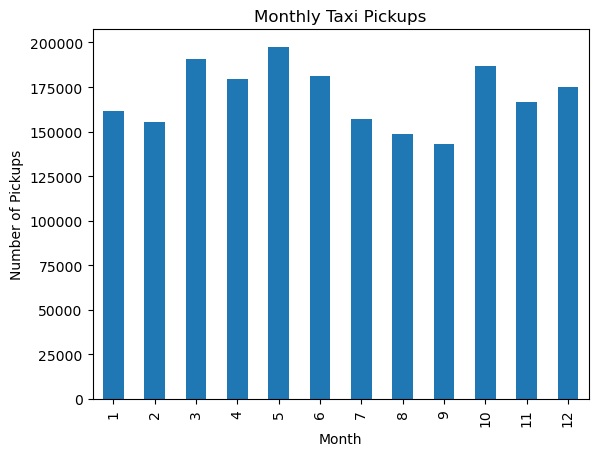

In [125]:
# Show the monthly trends in pickups
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

df.groupby('pickup_month').size().plot.bar()

plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.title("Monthly Taxi Pickups")
plt.show()



##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [69]:
# Analyse the above parameters

cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# summary statistics
df[cols].describe()

# count zero/negative values
(df[cols] <= 0).sum()



fare_amount           0
tip_amount       436965
total_amount          0
trip_distance         0
dtype: int64

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [70]:
# Create a df with non zero entries for the selected parameters.
df_financial = df[
    (df['fare_amount'] > 0) &
    (df['total_amount'] > 0) &
    (df['trip_distance'] > 0)
]

df_financial.shape


(2043684, 22)

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [124]:
# Group data by month and analyse monthly revenue
# extract month
df_financial['month'] = df_financial['tpep_pickup_datetime'].dt.month

# calculate monthly revenue
monthly_revenue = df_financial.groupby('month')['total_amount'].sum()

# plot
monthly_revenue.plot.barh()

plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.title("Monthly Taxi Revenue Trend")
plt.show()



**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [72]:
# Calculate proportion of each quarter
# create quarter column
df_financial['quarter'] = df_financial['tpep_pickup_datetime'].dt.quarter

# revenue per quarter
quarter_revenue = df_financial.groupby('quarter')['total_amount'].sum()

# proportion
quarter_proportion = quarter_revenue / quarter_revenue.sum()

quarter_proportion



quarter
1    0.238114
2    0.276369
3    0.223823
4    0.261695
Name: total_amount, dtype: float64

3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

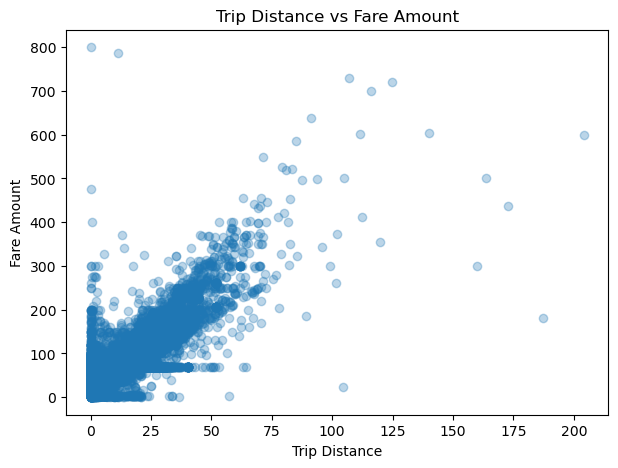

In [83]:
# Show how trip fare is affected by distance
temp = df[df['trip_distance'] > 0]

# scatter plot
plt.figure(figsize=(7,5))
plt.scatter(temp['trip_distance'], temp['fare_amount'], alpha=0.3)
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Trip Distance vs Fare Amount")
plt.show()




**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [84]:
# Show relationship between fare and trip duration
# create trip duration in minutes
df['trip_duration'] = (
    (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])
    .dt.total_seconds() / 60
)

temp = df[df['trip_duration'] > 0]

plt.figure(figsize=(7,5))
plt.scatter(temp['trip_duration'], temp['fare_amount'], alpha=0.3)
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount")
plt.title("Fare vs Trip Duration")
plt.show()
print("Correlation:", temp['fare_amount'].corr(temp['trip_duration']))



Correlation: 0.27061861410694965


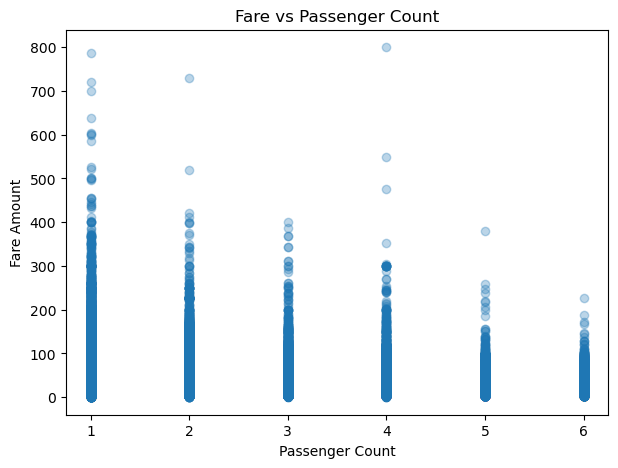

Correlation: 0.0411259152505417


In [85]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(7,5))
plt.scatter(df['passenger_count'], df['fare_amount'], alpha=0.3)
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount")
plt.title("Fare vs Passenger Count")
plt.show()
print("Correlation:", df['fare_amount'].corr(df['passenger_count']))

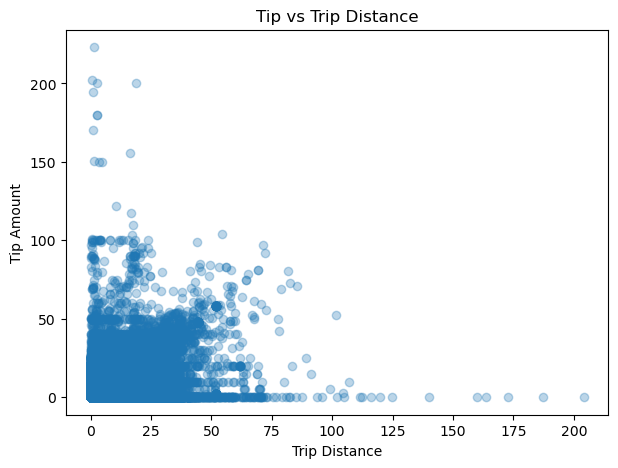

Correlation: 0.5984946177293222


In [86]:
# Show relationship between tip and trip distance

temp = df[df['trip_distance'] > 0]

plt.figure(figsize=(7,5))
plt.scatter(temp['trip_distance'], temp['tip_amount'], alpha=0.3)
plt.xlabel("Trip Distance")
plt.ylabel("Tip Amount")
plt.title("Tip vs Trip Distance")
plt.show()
print("Correlation:", temp['tip_amount'].corr(temp['trip_distance']))

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

payment_type
1    1672987
2     348714
3       7821
4      14162
Name: count, dtype: int64


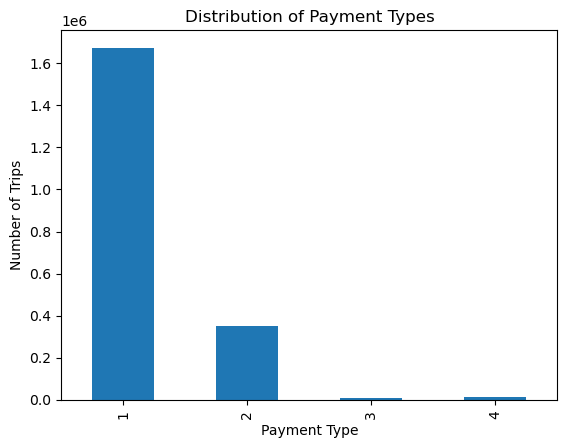

In [127]:
# Analyse the distribution of different payment types (payment_type).
payment_counts = df['payment_type'].value_counts().sort_index()

print(payment_counts)

payment_counts.plot.bar()

plt.xlabel("Payment Type")
plt.ylabel("Number of Trips")
plt.title("Distribution of Payment Types")
plt.show()



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [88]:
!pip install geopandas


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/22.9 MB ? eta -:--:--
   - -------------------------------------- 1.0/22.9 MB 18.3 MB/s eta 0:00:02
   --- ------------------------------------ 2.1/22.9 MB 7.2 MB/s eta 0:00:03
   ----- ---------------------------------- 3.1/22.9 MB 5.6 MB/s eta 0:00:04
   ------- -------------------------------- 4.2/22.9 MB 5.2 MB/s eta 0:00:04
   --------- ------------------------------ 5.2/22.9 MB 5.0 MB/s eta 0:00:04
   ---------- ----------------------------- 6.3/22.9 MB 5.0 MB/s eta 0:00:04
   ------------ --------------------------- 7.3/22.9 MB 4.8 MB/s eta 0:00:04
   -------------- ------------------------- 8.4/22.9 MB 5.3 MB/s eta 0:00:03
   -------------- ------------------------- 8.4/22.9 MB 5.3 MB/s eta 0:00:03
   -------------- ------------------------- 8.4/22.9 MB 5.3 MB/s eta 0:00:03
   ---------------- ----------------------- 9.4/22.9 MB 4.0 MB/s eta 0:00:04
   ---------------- ----------------------- 9.4/22.9 MB 4.0 MB/s eta 0:00:04
   -

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [90]:
import geopandas as gpd


# Read the shapefile using geopandas

zones = gpd.read_file(r"D:\anime movies\iiit-B\NYC taxi record analysis\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones\taxi_zones.shp")
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [91]:
 print(zones.info())
 zones.plot()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [92]:
# Merge zones and trip records using locationID and PULocationID

df_merged = df.merge(
    zones[['LocationID', 'zone', 'borough']],  
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
)

df_merged.head()



VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15                1   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46                2   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36                3   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55                1   
4         1  2023-01-01 00:42:56   2023-01-01 01:16:33                2   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74           1                  N           138           256   
1           1.24           1                  N           161           237   
2           1.44           1                  N           237           141   
3           0.54           1                  N           143           142   
4           7.10           1                  N           246            37   

   payment_type  ...  total_amount  congestion_surcharge  airport_fee  \
0             2  ...         41.15                   0.0         1.25   
1             1  ...         15.48                   2.5         0.00   
2             2  ...         16.40                   2.5         0.00   
3             2  ...         11.50                   2.5         0.00   
4             1  ...         47.40                   2.5         0.00   

   pickup_hour  pickup_day  pickup_month  trip_duration  LocationID  \
0            0      Sunday             1      15.950000       138.0   
1            0      Sunday             1       5.083333       161.0   
2            0      Sunday             1      10.550000       237.0   
3            0      Sunday             1       5.416667       143.0   
4            0      Sunday             1      33.616667       246.0   

                        zone    borough  
0          LaGuardia Airport     Queens  
1             Midtown Center  Manhattan  
2      Upper East Side South  Manhattan  
3        Lincoln Square West  Manhattan  
4  West Chelsea/Hudson Yards  Manhattan  

[5 rows x 26 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [93]:
# Group data by location and calculate the number of trips

zone_trips = df_merged.groupby('LocationID').size().reset_index(name='trip_count')

zone_trips.head()

LocationID  trip_count
0         1.0          73
1         2.0           2
2         4.0        2168
3         6.0          23
4         7.0         807

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [94]:
# Merge trip counts back to the zones GeoDataFrame

zones = zones.merge(zone_trips, on='LocationID', how='left')
zones['trip_count'] = zones['trip_count'].fillna(0)

zones.head()


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   trip_count  
0        73.0  
1         2.0  
2         0.0  
3      2168.0  
4         0.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

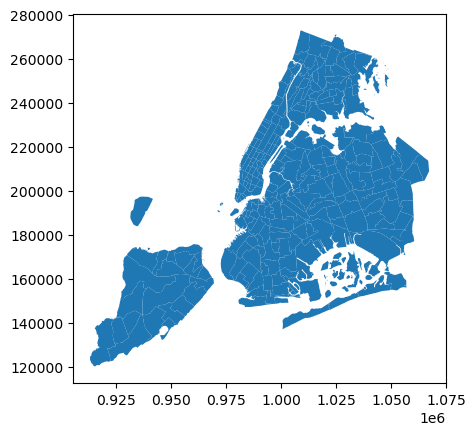

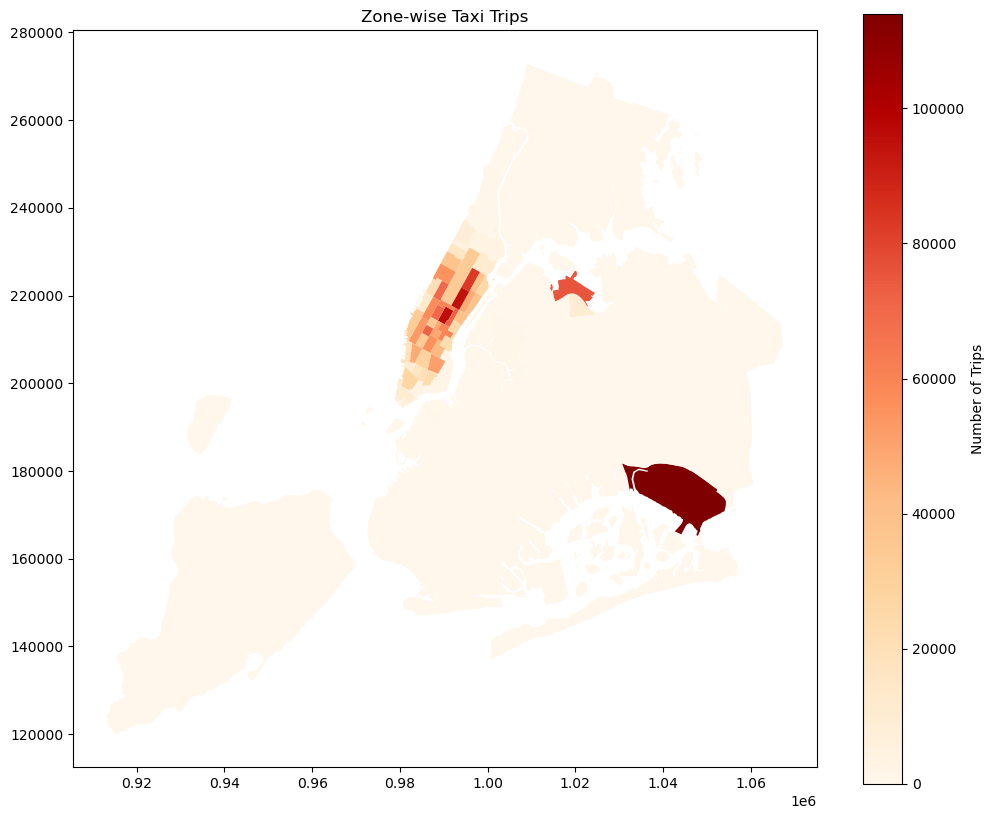

In [95]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
zones.plot(
    column='trip_count',
    ax=ax,
    cmap='OrRd',
    legend=True,
    legend_kwds={'label': 'Number of Trips'}
)

plt.title("Zone-wise Taxi Trips")
plt.show()


In [96]:
# can you try displaying the zones DF sorted by the number of trips?

zones.sort_values(by='trip_count', ascending=False).head()

OBJECTID  Shape_Leng  Shape_Area                   zone  LocationID  \
131       132    0.245479    0.002038            JFK Airport         132   
160       161    0.035804    0.000072         Midtown Center         161   
236       237    0.042213    0.000096  Upper East Side South         237   
235       236    0.044252    0.000103  Upper East Side North         236   
137       138    0.107467    0.000537      LaGuardia Airport         138   

       borough                                           geometry  trip_count  
131     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...    114021.0  
160  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...     95555.0  
236  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...     94622.0  
235  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...     83194.0  
137     Queens  MULTIPOLYGON (((1019904.219 225677.983, 102031...     75284.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

pickup_hour
22    0.230835
1     0.254940
3     0.275293
2     0.298608
4     0.323468
Name: speed, dtype: float64


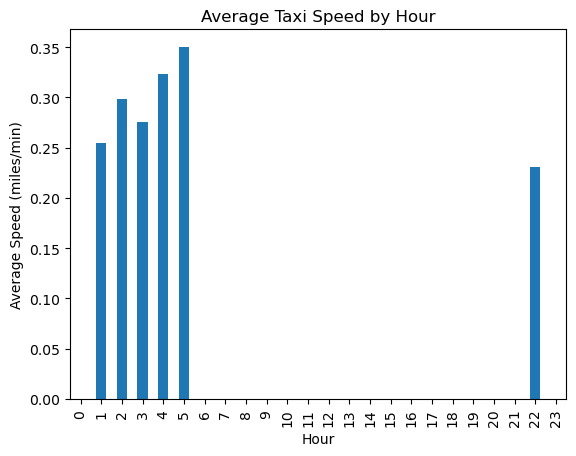

In [139]:
# Find routes which have the slowest speeds at different times of the day
# calculate speed (miles per minute)
df['speed'] = df['trip_distance'] / df['trip_duration']

# average speed per hour
hour_speed = df.groupby('pickup_hour')['speed'].mean()

# slowest hours
print(hour_speed.sort_values().head())

hour_speed.plot.bar()
plt.xlabel("Hour")
plt.ylabel("Average Speed (miles/min)")
plt.title("Average Taxi Speed by Hour")
plt.show()



How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

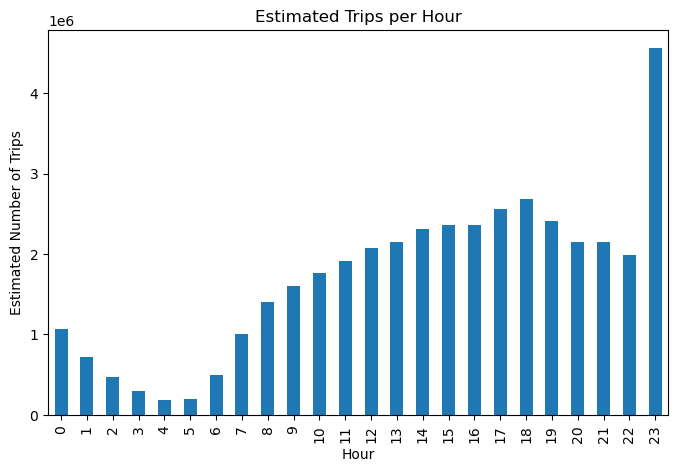

Busiest hour: 23
Estimated trips in busiest hour: 4555600


In [100]:
# Visualise the number of trips per hour and find the busiest hour
# trips per hour (sampled)
hour_counts = df.groupby('pickup_hour').size()

# scale to actual trips
hour_counts_actual = hour_counts * 20

# plot ACTUAL trips
hour_counts_actual.plot(kind='bar', figsize=(8,5))
plt.xlabel("Hour")
plt.ylabel("Estimated Number of Trips")
plt.title("Estimated Trips per Hour")
plt.show()

# busiest hour using ACTUAL counts
busiest_hour = hour_counts_actual.idxmax()
print("Busiest hour:", busiest_hour)
print("Estimated trips in busiest hour:", hour_counts_actual.max())



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [101]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05  
hour_counts = df.groupby('pickup_hour').size()

hour_counts_actual = hour_counts / sample_fraction

top5 = hour_counts_actual.sort_values(ascending=False).head(5)

print(top5)



pickup_hour
23    4555600.0
18    2686980.0
17    2563640.0
19    2414060.0
15    2364340.0
dtype: float64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [117]:
# Compare traffic trends for the week days and weekends
df['day_type'] = df['pickup_day'].apply(
    lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday'
)

traffic = df.groupby(['pickup_hour', 'day_type']).size().unstack()

traffic.plot.bar()
plt.xlabel("Hour")
plt.ylabel("Trips")
plt.title("Weekday vs Weekend Trips by Hour")
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [110]:
# Find top 10 pickup and dropoff zones

# Top 10 pickup zones
top_pickup = df['PULocationID'].value_counts().head(10)

# Top 10 dropoff zones
top_dropoff = df['DOLocationID'].value_counts().head(10)

print("Top Pickup Zones:", top_pickup)
print("Top Dropoff Zones:", top_dropoff)




Top Pickup Zones: PULocationID
132    114021
161     95555
237     94622
236     83194
138     75284
162     72204
186     72037
230     70320
142     69832
163     60360
Name: count, dtype: int64
Top Dropoff Zones: DOLocationID
236    89242
237    84058
161    77532
230    62154
170    60564
162    57246
239    57141
142    56957
141    54975
68     51798
Name: count, dtype: int64


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [111]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = df['PULocationID'].value_counts()
drop_counts = df['DOLocationID'].value_counts()

ratio = (pickup_counts / drop_counts).fillna(0)

print("Top 10 ratios:", ratio.sort_values(ascending=False).head(10))
print("Bottom 10 ratios:", ratio.sort_values().head(10))


Top 10 ratios: 70     10.364286
132     5.485735
138     3.264418
186     1.639515
114     1.486242
249     1.382242
43      1.371715
162     1.261293
100     1.236898
161     1.232459
Name: count, dtype: float64
Bottom 10 ratios: 30     0.0
221    0.0
245    0.0
214    0.0
199    0.0
176    0.0
3      0.0
84     0.0
99     0.0
109    0.0
Name: count, dtype: float64


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [109]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_df = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]

# top 10 pickup zones (night only)
top_pickup_night = night_df['PULocationID'].value_counts().head(10)

# top 10 dropoff zones (night only)
top_dropoff_night = night_df['DOLocationID'].value_counts().head(10)

print("Top 10 Night Pickup Zones:", top_pickup_night)
print("Top 10 Night Dropoff Zones:", top_dropoff_night)


Top 10 Night Pickup Zones: PULocationID
132    29107
79     22680
249    18722
48     17358
230    14959
138    14497
114    13432
148    13228
186    13027
161    11562
Name: count, dtype: int64
Top 10 Night Dropoff Zones: DOLocationID
79     13326
48     11759
170    10502
107     9811
141     9778
68      9545
263     8966
236     8665
230     8182
239     8113
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [114]:
# Filter for night hours (11 PM to 5 AM)

night_df = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]

# Day hours = remaining
day_df = df[~((df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5))]

# total revenue
total_revenue = df['total_amount'].sum()
night_revenue = night_df['total_amount'].sum()
day_revenue = day_df['total_amount'].sum()

# revenue share
night_share = (night_revenue / total_revenue) * 100
day_share = (day_revenue / total_revenue) * 100


print(f"Night share: {night_share:.2f}%")
print(f"Day share: {day_share:.2f}%")


Night share: 19.05%
Day share: 80.95%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [115]:
# Analyse the fare per mile per passenger for different passenger counts

temp = df[(df['trip_distance'] > 0) & (df['passenger_count'] > 0)]

# compute fare per mile per passenger
temp['fare_per_mile_per_passenger'] = (
    temp['fare_amount'] / (temp['trip_distance'] * temp['passenger_count'])
)

# average for each passenger count
result = temp.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()

print(result)


passenger_count
1    10.991609
2     6.492893
3     4.066311
4     4.131438
5     1.671877
6     1.336476
Name: fare_per_mile_per_passenger, dtype: float64


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

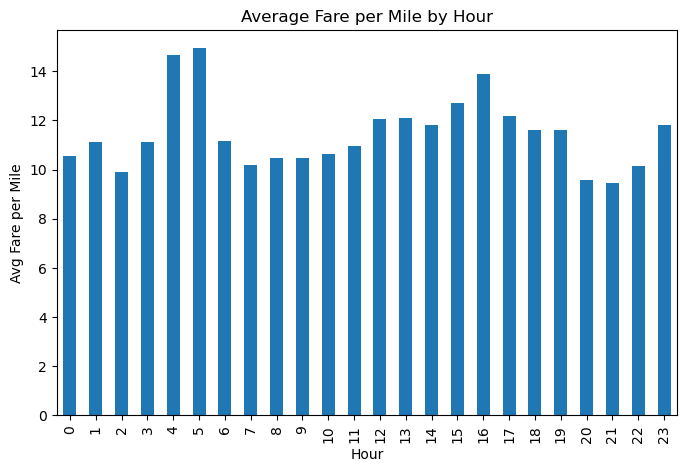

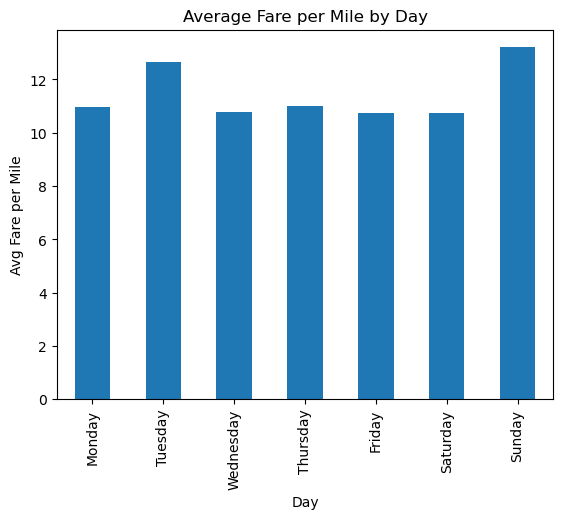

In [116]:
# Compare the average fare per mile for different days and for different times of the day

temp = df[df['trip_distance'] > 0].copy()

# fare per mile
temp['fare_per_mile'] = temp['fare_amount'] / temp['trip_distance']

#hourr
hour_avg = temp.groupby('pickup_hour')['fare_per_mile'].mean()

hour_avg.plot(kind='bar', figsize=(8,5))
plt.xlabel("Hour")
plt.ylabel("Avg Fare per Mile")
plt.title("Average Fare per Mile by Hour")
plt.show()


#day
day_avg = temp.groupby('pickup_day')['fare_per_mile'].mean()

order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_avg = day_avg.reindex(order)

day_avg.plot.bar()
plt.xlabel("Day")
plt.ylabel("Avg Fare per Mile")
plt.title("Average Fare per Mile by Day")
plt.show()



**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

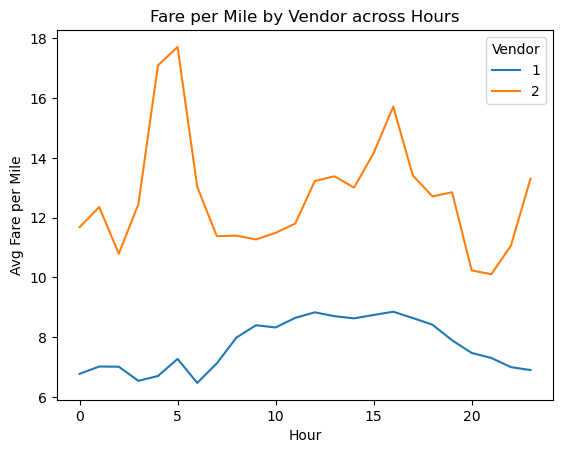

In [119]:
# Compare fare per mile for different vendors

vendor_hour = temp.groupby(['VendorID','pickup_hour'])['fare_per_mile'].mean().unstack()

vendor_hour.T.plot()
plt.xlabel("Hour")
plt.ylabel("Avg Fare per Mile")
plt.title("Fare per Mile by Vendor across Hours")
plt.legend(title="Vendor")
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [121]:
# Defining distance tiers
temp['distance_tier'] = pd.cut(
    temp['trip_distance'],
    bins=[0,2,5,1000],
    labels=['0-2','2-5','>5']
)

tier_avg = temp.groupby(['VendorID','distance_tier'])['fare_per_mile'].mean().unstack()

tier_avg.plot.barh()
plt.xlabel("Vendor")
plt.ylabel("Avg Fare per Mile")
plt.title("Fare per Mile by Distance Tier and Vendor")
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [122]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
temp['tip_percent'] = (temp['tip_amount'] / temp['total_amount']) * 100

# by distance
print(temp.groupby('distance_tier')['tip_percent'].mean())

# by passengers
print(temp.groupby('passenger_count')['tip_percent'].mean())

# by hour
print(temp.groupby('pickup_hour')['tip_percent'].mean())


distance_tier
0-2    12.168299
2-5    12.363001
>5     11.524164
Name: tip_percent, dtype: float64
passenger_count
1    12.243665
2    11.835483
3    11.336420
4    10.509855
5    12.142471
6    12.313757
Name: tip_percent, dtype: float64
pickup_hour
0     12.019249
1     11.963979
2     11.794619
3     11.325153
4     10.674750
5     10.589485
6     11.363494
7     12.093292
8     12.394939
9     12.220482
10    11.917707
11    11.908831
12    11.904124
13    11.833218
14    11.872923
15    11.845516
16    11.874815
17    12.154586
18    12.316583
19    12.283841
20    12.488953
21    12.630947
22    12.569752
23    12.205951
Name: tip_percent, dtype: float64


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [128]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

df['tip_percent'] = (df['tip_amount'] / df['total_amount']) * 100

# split groups
low_tip  = df[df['tip_percent'] < 10]
high_tip = df[df['tip_percent'] > 25]

print("Low tip trips:", len(low_tip))
print("High tip trips:", len(high_tip))

print("Low tip avg:", low_tip[['trip_distance','fare_amount']].mean())
print("High tip avg:", high_tip[['trip_distance','fare_amount']].mean())



Low tip trips: 672753
High tip trips: 10149
Low tip avg: trip_distance     3.689336
fare_amount      20.480742
dtype: float64
High tip avg: trip_distance     2.361680
fare_amount      14.362284
dtype: float64


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [130]:
# See how passenger count varies across hours and days
# average passenger count by hour
df.groupby('pickup_hour')['passenger_count'].mean().plot.bar()
plt.title("Avg Passenger Count by Hour")
plt.ylabel("Avg Passengers")
plt.show()

# average passenger count by day
df.groupby('pickup_day')['passenger_count'].mean().plot.bar()
plt.title("Avg Passenger Count by Day")
plt.ylabel("Avg Passengers")
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [131]:
# How does passenger count vary across zones

zone_passengers = df.groupby('PULocationID')['passenger_count'].mean()

print(zone_passengers.sort_values(ascending=False).head(10))


PULocationID
178    6.000000
183    2.500000
108    2.400000
149    2.200000
14     2.132353
150    2.000000
248    2.000000
201    2.000000
58     2.000000
6      1.956522
Name: passenger_count, dtype: float64


In [134]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
zones_with_trips = zones.copy()

avg_pass = df.groupby('PULocationID')['passenger_count'].mean().reset_index()

zones_with_trips = zones_with_trips.merge(avg_pass,
                                         left_on='LocationID',
                                         right_on='PULocationID',
                                         how='left')

zones_with_trips.head()



OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   trip_count  PULocationID  passenger_count  
0        73.0           1.0         1.205479  
1         2.0           2.0         1.000000  
2         0.0           NaN              NaN  
3      2168.0           4.0         1.457565  
4         0.0           NaN              NaN

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [135]:
# How often is each surcharge applied?
charges = ['extra', 'mta_tax', 'congestion_surcharge', 'airport_fee']

for c in charges:
    print(c, "applied:", (df[c] > 0).sum())



extra applied: 1330018
mta_tax applied: 2030923
congestion_surcharge applied: 1903216
airport_fee applied: 189199


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [137]:
#The demand for taxis obviously varies by time of day and place. The number of trips is lowest in the early morning (3–5 AM) and highest in the late evening and night (especially around 11 PM). During working hours, demand is higher on weekdays than on weekends.

#In order to maximize dispatching and routing:

#Increase the number of taxis during rush hour (late at night and evening).

#minimize the number of idle cars during off-peak hours.

#position taxis in high-demand pickup locations, like LaGuardia Airport, JFK Airport, and Midtown Manhattan.

#Driver utilization will increase and passenger wait times will decrease as a result.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
#when i comes to  zone-wise analysis, a significant percentage of trips are attributed to a limited number of zones. The busiest pickup and drop-off locations are Midtown Center, JFK Airport, and the Upper East Side.

#Thus:There should be more taxis parked consistently close to commercial centers and airports.

#Pay attention to business related ares during business hours.

#In order to prevent idle time fewer vehicles must be parked in low-demand areas.

#Strategic placement can be done to  maximizes the frequency of trip and helps balance supply and demand.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
#According to fare analysis, the fare increases in direct proportion to the trip distance. Even though daytime hours generate the largest revenue contribution, nighttime travel still contributes significantly.

#Based on pricing insighs:

#To slightly increase pice during peak hours o maximize pofits

#To provide discounts during times when demand is low.

#It is possible to effectively price shared rides for larger passenger counts in order to draw moer people.

#Without lowering customer satisfaction, a pricing strategy based on time, distance, and demand can greatly increase overall revenue.